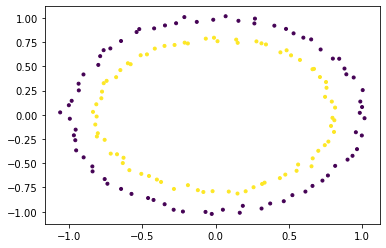

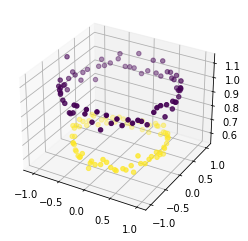

Prediction time:
0.1197052001953125 seconds


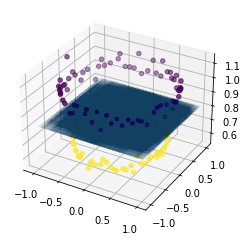

In [123]:
#Example of using SVM with nonlinear data transformation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
  
# generating a toy dataset 
# make_circles Makes a large circle containing a smaller circle in 2d.
# X and Y are 2 features

X, Y = make_circles(n_samples = 150, noise = 0.02)
    
# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.show()


import time
start = time.time()

# adding a new dimension to X
# reshape Gives a new shape to an array without changing its data.
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
# X3 is the non-linear combination of the original features:
X3 = (X1**2 + X2**2)
# The hstack() function is used to stack arrays in sequence horizontally (column wise).
X = np.hstack((X, X3))

# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
plt.show()


# Now, we use SVM to learn a 2-dimensional separating hyperplane.
# create support vector classifier using a linear kernel
from sklearn import svm
  
svc = svm.SVC(kernel = 'linear')
svc.fit(X, Y)
w = svc.coef_
b = svc.intercept_
  
# plotting the separating hyperplane
x1 = X[:, 0].reshape((-1, 1))
x2 = X[:, 1].reshape((-1, 1))
x1, x2 = np.meshgrid(x1, x2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]

print('Prediction time:')
end = time.time()
print(end - start, "seconds")

fig = plt.figure()
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(X1, X2, X3, c = Y, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(x1, x2, x3, alpha = 0.01)
plt.show()

In [114]:
# Example – SVM Model with RBF Kernel (Kernel Trick)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
 
# Load the IRIS dataset
 
iris = datasets.load_iris();
X = iris.data
y = iris.target
 
# Create training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)

print("Unscaled features:")
print(X_train[0:1])

# Feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print("\nScaled features:")
print(X_train_std[0:1])

import time
start = time.time()

# Fit the model with RBF kernel
# C: Regularization parameter
# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# kernel: kernel type to be used in the algorithm such as Radial Basis Function (RBF).
svc = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svc.fit(X_train_std, y_train)
y_pred = svc.predict(X_test_std)

end = time.time()

print('\nPrediction time:')
print(end - start, "seconds")


 
# Evaluating the performance
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

(150, 4)
Unscaled features:
[[5.5 4.2 1.4 0.2]]

Scaled features:
[[-0.4301064   2.63118533 -1.33269725 -1.30728421]]

Prediction time:
0.005794048309326172 seconds

Accuracy: 0.978


RBF Kernel:
   $ k(x,y)= exp(-\frac{||x-y||^2}{2 \sigma}) $